In [2]:
from scipy.stats import moment
from numpy import mean, var
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import random

In [3]:
# set configurations for number of samples and moments
s_size = 1000
nr_sample = 10
nr_moments =5

In [4]:
# Samples from distributions with bounded intervals
from scipy.stats import arcsine, beta, powerlaw, trapezoid, triang, uniform

r_arcsine = arcsine.rvs(size=(nr_sample, s_size), random_state=10)
r_beta = beta.rvs(a=1, b=2, size=(nr_sample, s_size), random_state=10)
r_powerlaw = powerlaw.rvs(a=0.5, size=(nr_sample, s_size), random_state=10)
r_trapezoid = trapezoid.rvs(c=0.3, d=0.8, size=(nr_sample, s_size), random_state=10)
r_traing = triang.rvs(c=0.3, size=(nr_sample, s_size), random_state=10)
r_uniform = uniform.rvs(size=(nr_sample, s_size), random_state=10)

In [15]:
rvs = [r_arcsine, r_beta, r_powerlaw, r_trapezoid, r_traing, r_uniform]
dists_names = ['arcsine', 'beta', 'powerlaw', 'trapezoid', 'triangular', 'uniform']

bounded_c = pd.DataFrame()

# parameter moment is the central mean, so I used mean() for n=1
for i in range(len(rvs)):
    m = np.zeros((nr_moments,nr_sample))
    m[0,]  = mean(rvs[i], axis = 1)
    m[0,]  = mean(rvs[i], axis = 1)
    for n in range(2,nr_moments+1):
        m[n-1,] = moment(rvs[i], n, axis=1)
        
    df_temp = pd.DataFrame(np.transpose(m))
    df_temp['dist'] = dists_names[i]

    bounded_c=pd.concat([bounded_c, df_temp], ignore_index=True)

# write to csv
bounded_c.to_csv('bounded_c.csv', index=False) 

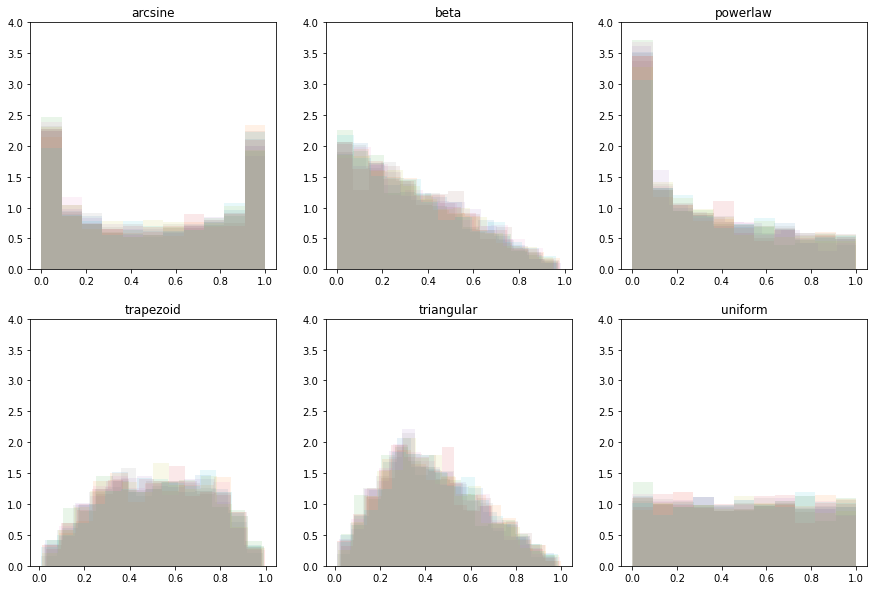

In [16]:
# plotting
nrow = 2
ncol = 3
fig, ax = plt.subplots(nrow, ncol, figsize =(15,10))

for row in range(nrow):
    for col in range(ncol):
        for i in range(nr_sample):
            ax[row,col].hist(rvs[row*3+col][i,:],density=True, histtype='stepfilled', bins='auto', alpha=0.1)
            ax[row,col].set_title(dists_names[row*3+col])
            #ax[row,col].set_xlim(0,1)
            ax[row,col].set_ylim(0,4)

In [8]:
from scipy.stats import cauchy, lognorm, pareto, powerlaw, weibull_min, weibull_max
r_cauchy = cauchy.rvs(size=(nr_sample, s_size), random_state=10)
r_lognorm = lognorm.rvs(s = 1.5, size=(nr_sample, s_size), random_state=10)
r_pareto_15 = pareto.rvs(b=1.5, size=(nr_sample, s_size), random_state=10)
r_weibull_min_04 = weibull_min.rvs(c=0.4, size=(nr_sample, s_size), random_state=10)

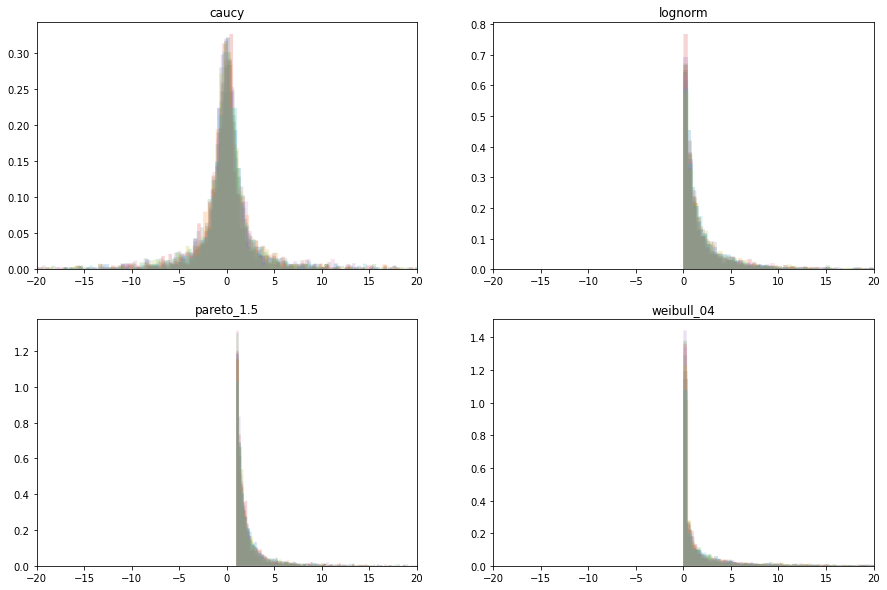

In [19]:
rvs = [r_cauchy, r_lognorm, r_pareto_15, r_weibull_min_04]
dists_names = ['caucy', 'lognorm', 'pareto_1.5', 'weibull_04']

nrow = 2
ncol = 2
fig, ax = plt.subplots(nrow, ncol, figsize =(15,10))

for row in range(nrow):
    for col in range(ncol):
        for i in range(nr_sample):
            ax[row,col].hist(rvs[row*2+col][i,:],density=True, histtype='stepfilled', bins='auto', alpha=0.2)
            ax[row,col].set_title(dists_names[row*2+col])
            ax[row,col].set_xlim(-20,20)
            #ax[row,col].set_ylim(0,10)

In [133]:
print(r_pareto_15.mean(),np.quantile(r_pareto_15,0.95),r_pareto_15.max())

3.1481501283143434 7.114772042431627 2127.0141170623865


In [134]:
print(r_lognorm.mean(),np.quantile(r_lognorm,0.95),r_lognorm.max())

3.0035003074819584 11.259850529254386 253.9745323341032


In [135]:
print(r_cauchy.mean(),np.quantile(r_cauchy,0.95),r_cauchy.max())

3.893701220629771 5.985479009078251 31225.2328519563


In [136]:
print(r_weibull_min_04.mean(),np.quantile(r_weibull_min_04,0.95),r_weibull_min_04.max())

3.277119072401263 14.861802370378788 447.8687353791527
